# Regression analysis
This part of our case study on ER time optimisation will be on measuring the affecting
factors on the waitng time and patient outcome. Starting by importing libararies and loading our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("clean_ER.csv")

In [5]:
x = pd.get_dummies(df[['urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name']], drop_first =True)

In [7]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()['total_wait_time'].sort_values(ascending=False)

# Add 'total_wait_time' to the dummy variables DataFrame
x['total_wait_time'] = df['total_wait_time']
catigorical_correlations = x.corr()['total_wait_time']
print(correlations)
print(catigorical_correlations)

total_wait_time                 1.000000
time_of_medical_professional    0.976446
time_to_triage                  0.953604
time_of_registration            0.924238
nurse-to-patient_ratio          0.688015
specialist_availability         0.006579
facility_size                  -0.003578
patient_satisfaction           -0.865145
Name: total_wait_time, dtype: float64
urgency_level_High                           -0.327579
urgency_level_Low                             0.765404
urgency_level_Medium                          0.102079
day_of_week_Monday                            0.123033
day_of_week_Saturday                         -0.058017
day_of_week_Sunday                           -0.092920
day_of_week_Thursday                          0.013776
day_of_week_Tuesday                          -0.017399
day_of_week_Wednesday                        -0.020997
month_August                                  0.037282
month_December                                0.088597
month_February               

In [8]:
corelation_matrix = df[['nurse-to-patient_ratio', 'specialist_availability', 'total_wait_time', 'time_to_triage', 'time_of_medical_professional', 'time_of_registration']].corr()
print(corelation_matrix)

                              nurse-to-patient_ratio  specialist_availability  \
nurse-to-patient_ratio                      1.000000                 0.002511   
specialist_availability                     0.002511                 1.000000   
total_wait_time                             0.688015                 0.006579   
time_to_triage                              0.646690                -0.000512   
time_of_medical_professional                0.673622                 0.011028   
time_of_registration                        0.652054                 0.006500   

                              total_wait_time  time_to_triage  \
nurse-to-patient_ratio               0.688015        0.646690   
specialist_availability              0.006579       -0.000512   
total_wait_time                      1.000000        0.953604   
time_to_triage                       0.953604        1.000000   
time_of_medical_professional         0.976446        0.875145   
time_of_registration                 0.924

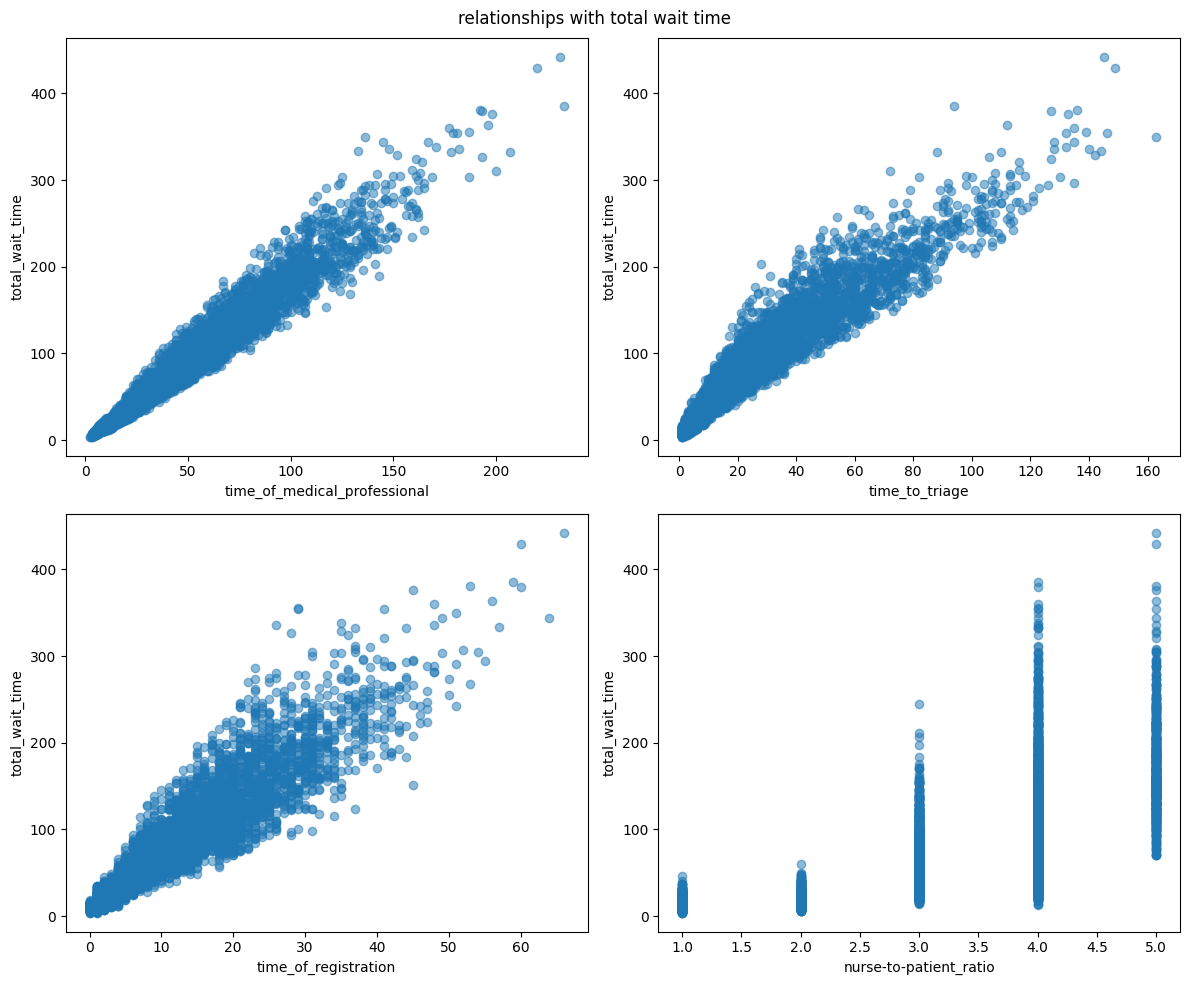

In [11]:
fig, axis = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('relationships with total wait time')


factors = df[['time_of_medical_professional', 'time_to_triage', 'time_of_registration', 'nurse-to-patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name']]
wait_time = df['total_wait_time']

for i, column in enumerate(factors.columns[:4]):
  row, col = i // 2 , i % 2
  axis[row, col].scatter(factors[column], wait_time, alpha = 0.5)
  axis[row, col].set_xlabel(column)
  axis[row, col].set_ylabel('total_wait_time')
plt.tight_layout()
plt.show()

In [15]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()['total_wait_time'].sort_values(ascending=False)

# Add 'total_wait_time' to the dummy variables DataFrame
x['total_wait_time'] = df['total_wait_time']
catigorical_correlations = x.corr()['total_wait_time']
print(correlations)
print(catigorical_correlations)

total_wait_time                 1.000000
time_of_medical_professional    0.976446
time_to_triage                  0.953604
time_of_registration            0.924238
nurse-to-patient_ratio          0.688015
specialist_availability         0.006579
facility_size                  -0.003578
patient_satisfaction           -0.865145
Name: total_wait_time, dtype: float64
urgency_level_High                           -0.327579
urgency_level_Low                             0.765404
urgency_level_Medium                          0.102079
day_of_week_Monday                            0.123033
day_of_week_Saturday                         -0.058017
day_of_week_Sunday                           -0.092920
day_of_week_Thursday                          0.013776
day_of_week_Tuesday                          -0.017399
day_of_week_Wednesday                        -0.020997
month_August                                  0.037282
month_December                                0.088597
month_February               

In [25]:
factors = df[['time_of_medical_professional', 'time_to_triage', 'time_of_registration', 'nurse-to-patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'patient_satisfaction']]
wait_time = df['total_wait_time']

# Apply one-hot encoding to the categorical columns and convert boolean to int
factors_encoded = pd.get_dummies(factors, drop_first=True).astype(int)

x_with_constant = sm.add_constant(factors_encoded)

model = sm.OLS(wait_time, x_with_constant)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        total_wait_time   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.221e+31
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:34:28   Log-Likelihood:             1.4152e+05
No. Observations:                5000   AIC:                        -2.830e+05
Df Residuals:                    4970   BIC:                        -2.828e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

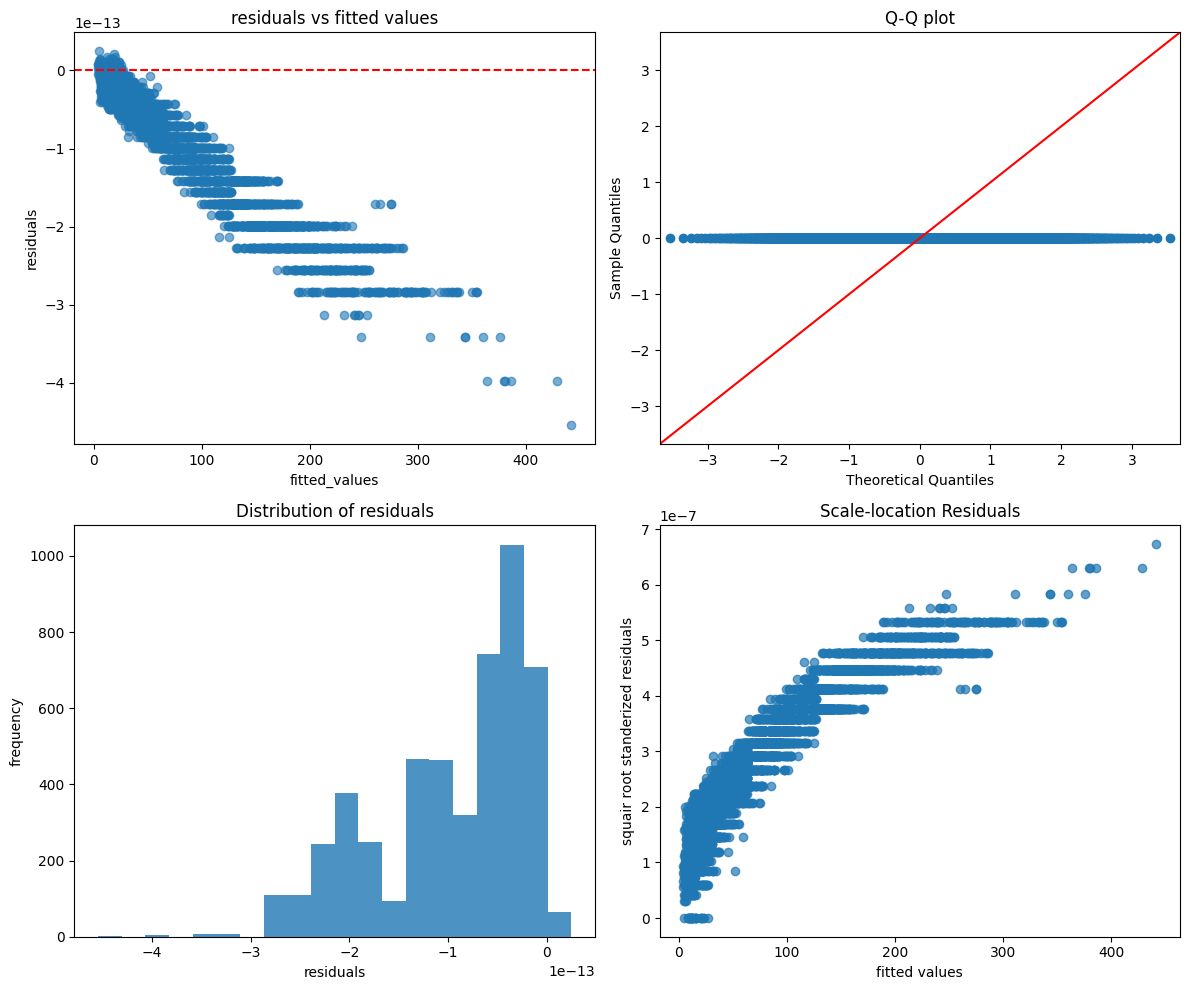

In [26]:
residuals = results.resid
fitted = results.fittedvalues

fig, axis = plt.subplots(2,2,figsize=(12,10))

axis[0,0].scatter(fitted,residuals, alpha= 0.6)
axis[0,0].axhline(y=0, color='red', linestyle='--')
axis[0,0].set_xlabel('fitted_values')
axis[0,0].set_ylabel('residuals')
axis[0,0].set_title('residuals vs fitted values')

sm.qqplot(residuals, line='45', ax=axis[0,1])
axis[0,1].set_title('Q-Q plot')


axis[1,0].hist(residuals, bins=20, alpha=0.8)
axis[1,0].set_xlabel('residuals')
axis[1,0].set_ylabel('frequency')
axis[1,0].set_title('Distribution of residuals')

axis[1,1].scatter(fitted, np.sqrt(np.abs(residuals)), alpha= 0.7)
axis[1,1].set_xlabel('fitted values')
axis[1,1].set_ylabel('squair root standerized residuals')
axis[1,1].set_title('Scale-location Residuals')

plt.tight_layout()
plt.show()

In [27]:
# Key metrics interpretation

print("=== REGRESSION ANALYSIS RESULTS ===")
print(f"R-squared: {results.rsquared:.4f}")  # Percentage of variance explained
print(f"Adjusted R-squared: {results.rsquared_adj:.4f}")
print(f"F-statistic: {results.fvalue:.2f}")
print(f"F-statistic p-value: {results.f_pvalue:.4f}")

print("\nSignificant Factors (p < 0.05):")
for feature, pval in zip(x_with_constant.columns, results.pvalues):
    if feature != 'const' and pval < 0.05:
        significance = "***" if pval < 0.001 else "**" if pval < 0.01 else "*"
        print(f"  {feature}: p-value = {pval:.4f} {significance}")

print("\nPractical Interpretation:")
for feature, coef in zip(x_with_constant.columns, results.params):
    if feature != 'const':
        print(f"  Each unit increase in {feature} is associated with {coef:.2f} change in wait time")

=== REGRESSION ANALYSIS RESULTS ===
R-squared: 1.0000
Adjusted R-squared: 1.0000
F-statistic: 52213264105793626963546623442944.00
F-statistic p-value: 0.0000

Significant Factors (p < 0.05):
  time_of_medical_professional: p-value = 0.0000 ***
  time_to_triage: p-value = 0.0000 ***
  time_of_registration: p-value = 0.0000 ***
  patient_satisfaction: p-value = 0.0000 ***
  urgency_level_High: p-value = 0.0060 **
  urgency_level_Low: p-value = 0.0062 **
  urgency_level_Medium: p-value = 0.0040 **
  season_Spring: p-value = 0.0032 **
  season_Summer: p-value = 0.0002 ***
  season_Winter: p-value = 0.0331 *
  hospital_name_Springfield General Hospital: p-value = 0.0367 *

Practical Interpretation:
  Each unit increase in time_of_medical_professional is associated with 1.00 change in wait time
  Each unit increase in time_to_triage is associated with 1.00 change in wait time
  Each unit increase in time_of_registration is associated with 1.00 change in wait time
  Each unit increase in nurs